# Importing Libraries

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score  
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC


# Read Data From CSV File

In [155]:
data = pd.read_csv('creditcard.csv')

# Visualizing Dataframe

In [156]:
print(data.head())
print(data.shape)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Checking For null data

In [157]:
data.isnull().values.any()

False

# Analizing Fraud and Valid transactions

In [160]:
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0]
print(fraud.shape,valid.shape)


(492, 31) (284315, 31)


# Data Visualization :

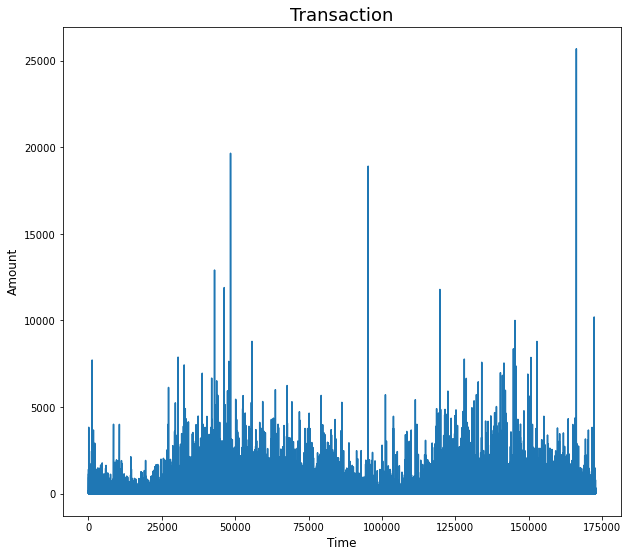

In [163]:
#Data Plotting Time vs Amount
fig=plt.figure(figsize = (10, 9))
plt.plot(data['Time'], data['Amount'])
plt.xlabel('Time', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Transaction', fontsize=18)
plt.show()

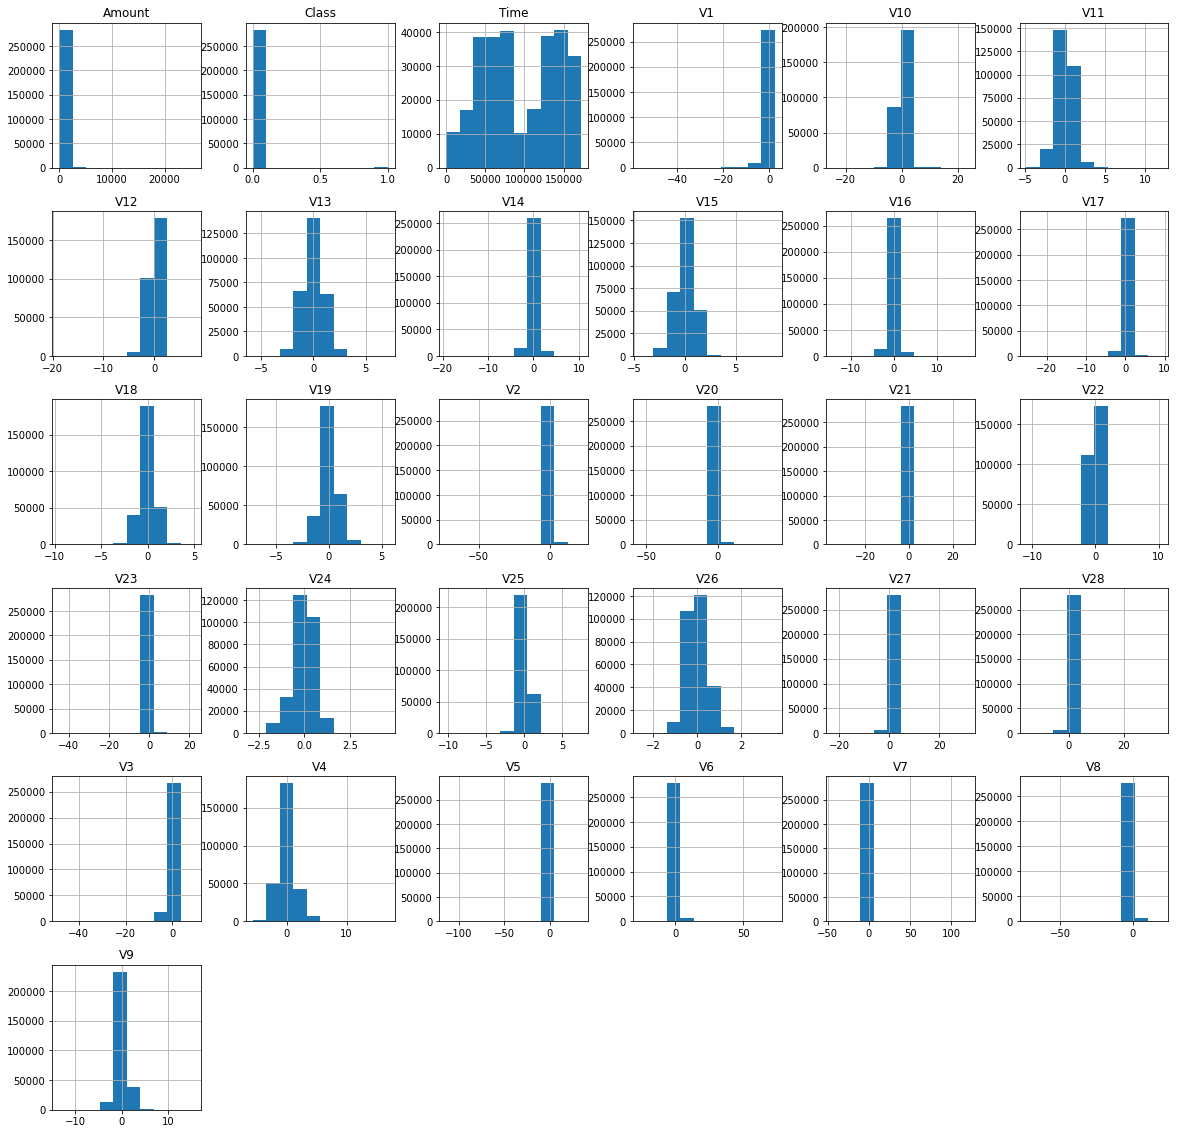

In [164]:
# Plotting histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()

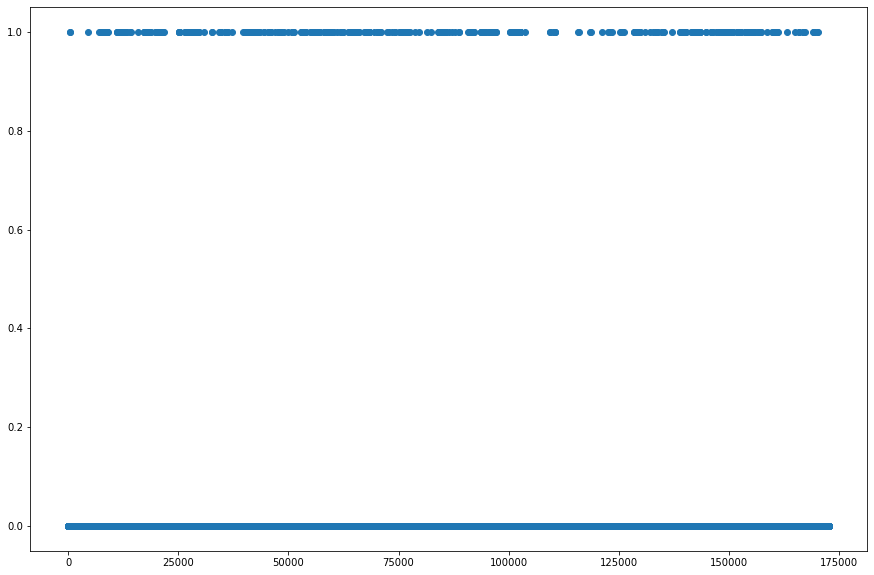

In [165]:
#Scatter plot of valid and fraud class
plt.figure(figsize=(15,10))
plt.scatter(data['Time'], data['Class'])
plt.show()

# Co-relation between each columns

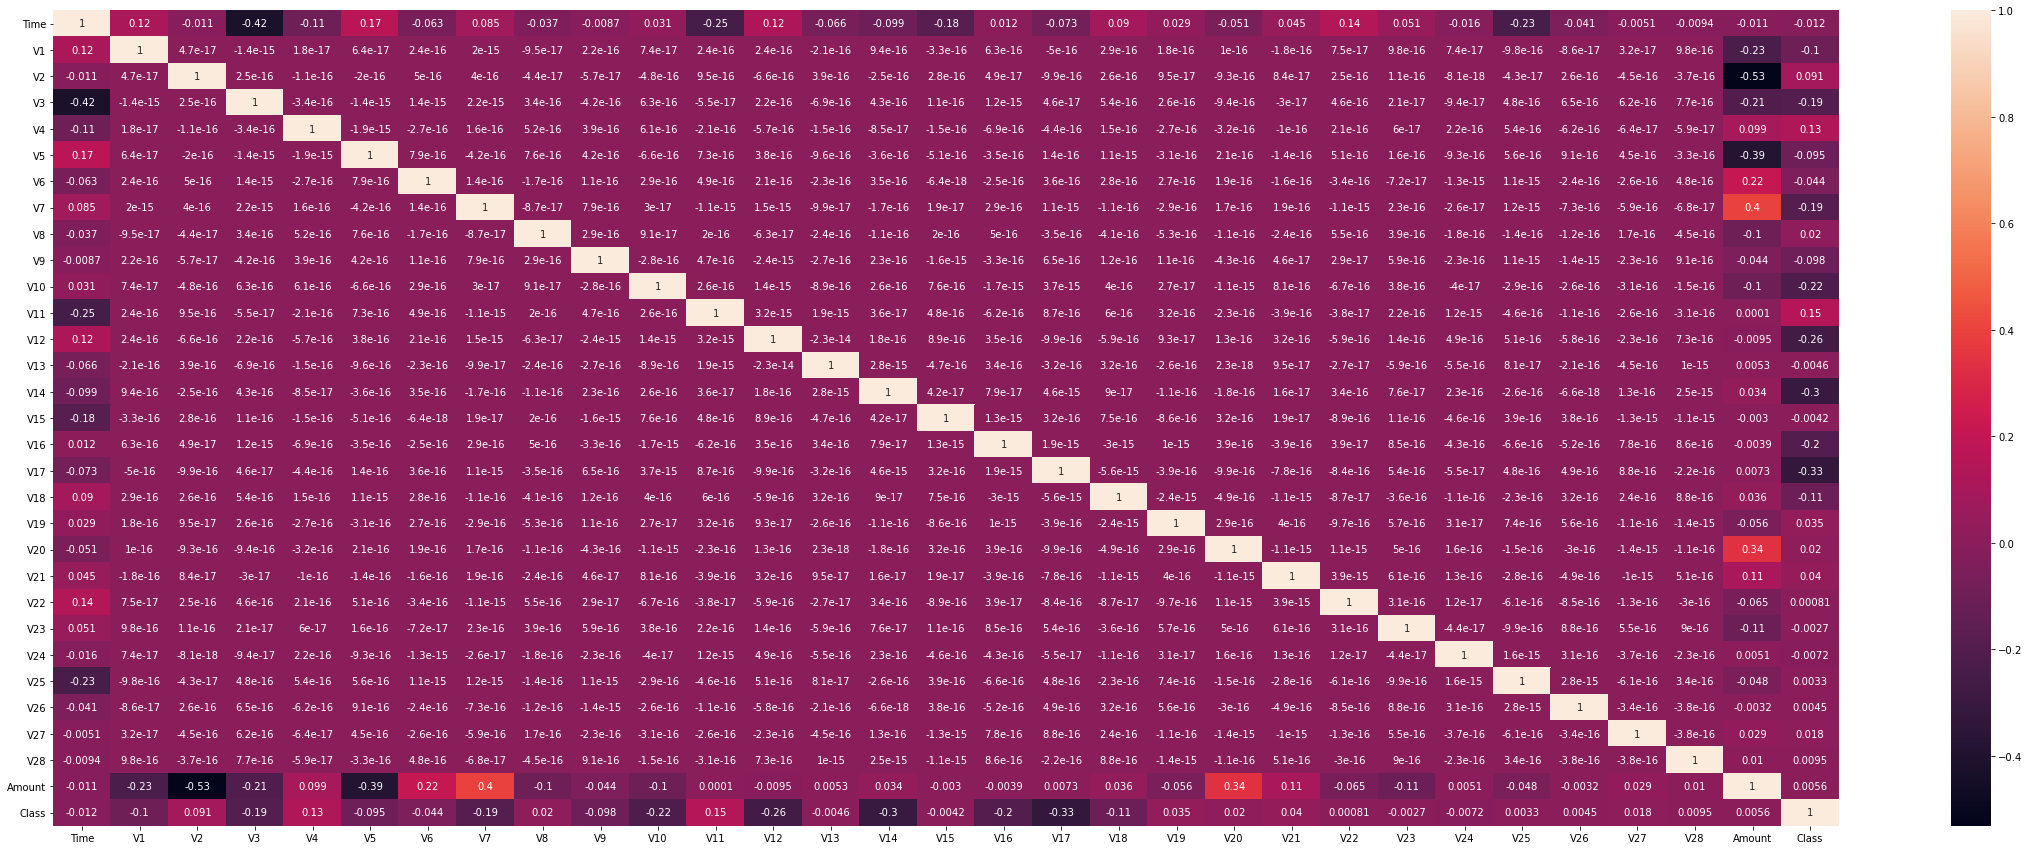

In [166]:
#heatmap
plt.rcParams['figure.figsize']=(40.0,15.0)
corrmat = data.corr()
#plot heat map
sns.heatmap(data[corrmat.index].corr(), annot=True)

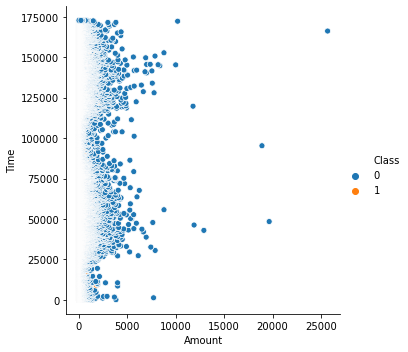

In [167]:
#relplot for relation between amount time and validity
sns.relplot(x="Amount", y="Time", hue="Class", data=data)

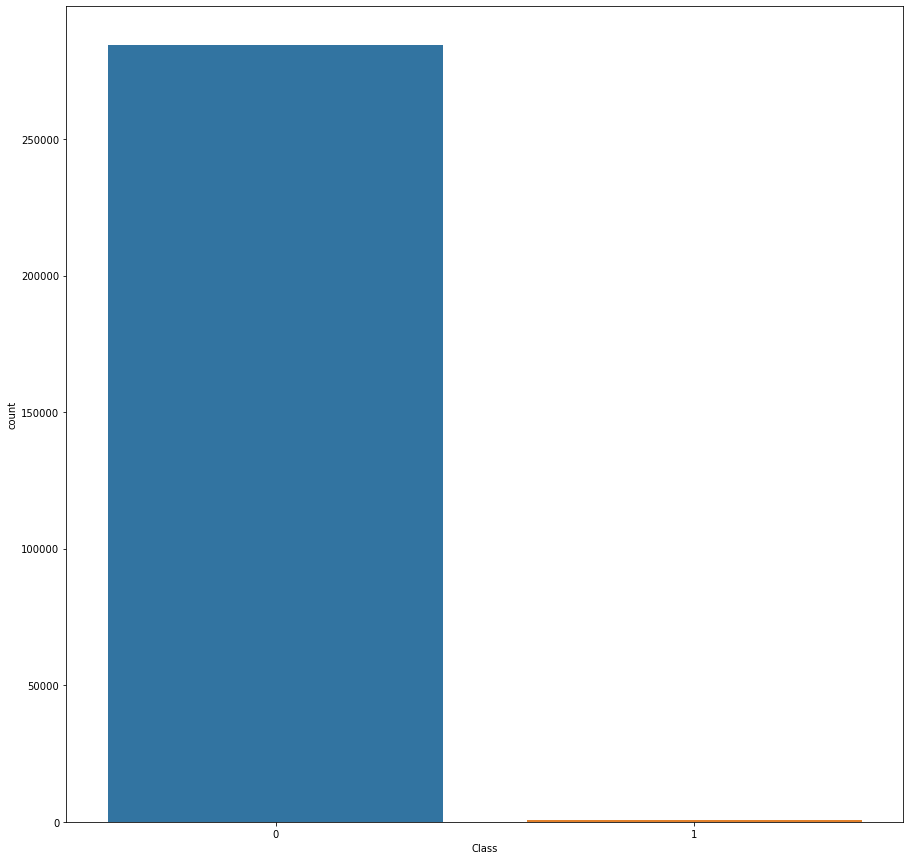

In [168]:
#count plot for valid and fraud transactions
fig=plt.figure(figsize=(15,15))
sns.countplot(x='Class',  data = data)

# Creating Test and Train data

In [169]:
X = data[['Time','Amount']].values
Y = data["Class"].values

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 40)

# Decision Tree Regressor

In [182]:
decisionModel = DecisionTreeRegressor(max_depth=3)
decisionModel.fit(xtrain, ytrain)
predictedTreeValues = decisionModel.predict(xtrain)

In [183]:
#Accuracy Test
acc = accuracy_score(ytest, ypred) 
print("The accuracy of Decision tree is {}".format(acc)) 

The accuracy of Decision tree is 0.9980337769039008


In [184]:
#Error in Train Data
errorTreeTrain = mean_squared_error(randomf.predict(xtrain), ytrain)
errorTreeTrain
#error in test data
errorTreeTest = mean_squared_error(decisionModel.predict(xtest), ytest)
errorTreeTrain, errorTreeTest

(1.3166845882068951e-05, 0.0016772430782547652)

# Random Forest Classifier

In [185]:
randomf = RandomForestClassifier() 
randomf.fit(xtrain, ytrain) 
# predictions 
ypred = randomf.predict(xtest) 

In [186]:
#Accuracy Test
acc = accuracy_score(ytest, ypred) 
print("The accuracy of Random forest is {}".format(acc)) 

The accuracy of Random forest is 0.9980513324672589


In [187]:
#Error in Train Data
errorTreeTrain = mean_squared_error(randomf.predict(xtrain), ytrain)
errorTreeTrain
#error in test data
errorTreeTest = mean_squared_error(decisionModel.predict(xtest), ytest)
errorTreeTrain, errorTreeTest

(2.1944743136781585e-05, 0.0016772430782547652)

# Naive Bayes Classifier

In [188]:
bayes = GaussianNB()
bayes.fit(xtrain, ytrain)
ypred=bayes.predict(xtest)


In [189]:
acc = accuracy_score(ytest, ypred) 
print("The accuracy of Naive Bayes is {}".format(acc)) 


The accuracy of Naive Bayes is 0.9982971103542713


In [190]:
#Error in Train Data
errorTreeTrain = mean_squared_error(randomf.predict(xtrain), ytrain)
errorTreeTrain
#error in test data
errorTreeTest = mean_squared_error(decisionModel.predict(xtest), ytest)
errorTreeTrain, errorTreeTest

(2.1944743136781585e-05, 0.0016772430782547652)

# Support Vector Machine

In [191]:
vectormachine = SVC()
vectormachine.fit(xtrain, ytrain)
ypred=vectormachine.predict(xtest)


In [192]:
acc = accuracy_score(ytest, ypred) 
print("The accuracy of SVM is {}".format(acc)) 

The accuracy of SVM is 0.9982971103542713


In [193]:
#Error in Train Data
errorTreeTrain = mean_squared_error(randomf.predict(xtrain), ytrain)
errorTreeTrain
#error in test data
errorTreeTest = mean_squared_error(decisionModel.predict(xtest), ytest)
errorTreeTrain, errorTreeTest

(2.1944743136781585e-05, 0.0016772430782547652)

# Bagging The Model

In [195]:
baggingModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators = 20)
baggingModel.fit(xtrain, ytrain)
#training data
errorBagging = mean_squared_error(ytrain, baggingModel.predict(xtrain))
errorBagging
#testing data
errorBaggingTest = mean_squared_error(ytest, baggingModel.predict(xtest))
errorBaggingTest, errorBagging

(0.0018413536656016292, 0.00029209662209445504)

# Boosting The Model

In [196]:
boostingModel = AdaBoostRegressor(learning_rate=0.01, n_estimators=10)
boostingModel.fit(xtrain, ytrain)
#Train boost
trainingBoostError = mean_squared_error(ytrain, boostingModel.predict(xtrain))
#Test boost
testingBoostError = mean_squared_error(ytest, boostingModel.predict(xtest))
trainingBoostError, testingBoostError

(0.001717076135547574, 0.0016862643534947732)

# Working on the equally distributed data

In [92]:
print(fraud.shape)

(492, 31)


In [93]:
data1 = data.sample(frac=1)

In [94]:
# amount of fraud classes = 492 rows.
fraud_data1 = data1.loc[data1['Class'] == 1]
non_fraud_data1 = data1.loc[data1['Class'] == 0][:492]

normal_distributed_data1 = pd.concat([fraud_data1, non_fraud_data1])

# Shuffle dataframe rows
new_data1 = normal_distributed_data1.sample(frac=1, random_state=42)

new_data1.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
262310,160411.0,-2.837026,1.797451,0.429158,1.095038,-1.178296,0.121337,-1.249417,-3.305167,0.749497,...,3.307025,-2.299452,0.911257,0.724252,-0.210264,-1.067317,0.078095,-0.502048,12.27,0
43061,41353.0,-15.020981,8.075240,-16.298091,5.664820,-11.918153,-4.246957,-14.716668,9.435084,-6.795398,...,2.525115,-0.832074,-0.186117,0.429781,0.697103,0.056031,-1.310888,-0.707403,34.12,1
265068,161724.0,2.070863,0.012639,-1.236749,0.368520,-0.052184,-1.331288,0.232968,-0.411974,0.576321,...,0.264257,0.953594,-0.003228,0.095271,0.266076,-0.105671,-0.013506,-0.056656,1.00,0
118308,75033.0,-0.430330,0.985633,0.645789,0.317131,0.616332,-1.347462,1.078234,-0.161518,-0.492856,...,-0.016378,-0.207609,-0.164119,0.255280,0.454798,-0.505032,-0.039456,-0.006358,30.14,1
154587,102114.0,-28.255053,21.467203,-26.871339,11.737436,-17.999630,6.065901,-41.506796,-38.987263,-13.434066,...,-21.453736,8.361985,4.909111,0.098328,-1.508739,0.008711,-5.407824,-0.183811,0.00,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


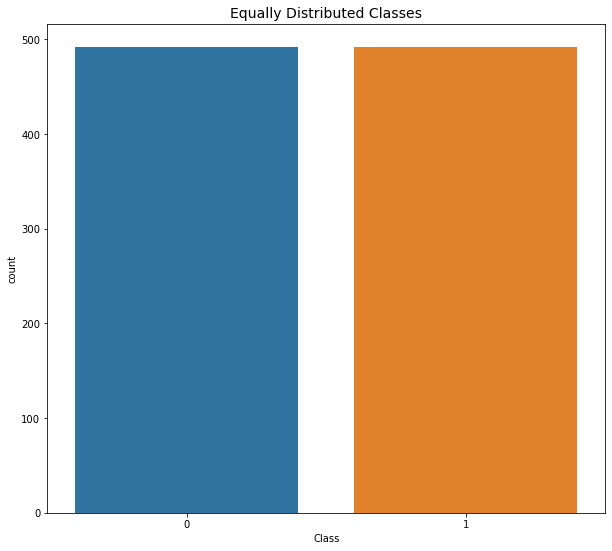

In [97]:
print('Distribution of the Classes in the subsample dataset')
print(new_data1['Class'].value_counts()/len(new_data1))

fig=plt.figure(figsize=(10,9))
sns.countplot('Class', data=new_data1)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [201]:
X = new_data1[['Time','Amount']].values
Y = new_data1["Class"].values

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 40)

In [202]:
randomf = RandomForestClassifier() 
randomf.fit(xtrain, ytrain) 
ypred = randomf.predict(xtest) 

acc = accuracy_score(ytest, ypred) 
print("The accuracy of Render forest is {}".format(acc)) 

The accuracy of Render forest is 0.7208121827411168


In [203]:
bayes = GaussianNB()
bayes.fit(xtrain, ytrain)
ypred=bayes.predict(xtest)

acc = accuracy_score(ytest, ypred) 
print("The accuracy of Naive Bayes is {}".format(acc)) 


The accuracy of Naive Bayes is 0.4720812182741117


In [204]:
vectormachine = SVC()
vectormachine.fit(xtrain, ytrain)
ypred=vectormachine.predict(xtest)

acc = accuracy_score(ytest, ypred) 
print("The accuracy of SVM is {}".format(acc)) 

The accuracy of SVM is 0.5025380710659898


In [205]:
#Error in Train Data
errorTreeTrain = mean_squared_error(randomf.predict(xtrain), ytrain)
errorTreeTrain
#error in test data
errorTreeTest = mean_squared_error(decisionModel.predict(xtest), ytest)
errorTreeTrain, errorTreeTest

(0.0, 0.5055001439576069)